In [62]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
from imblearn.over_sampling import SMOTE  # pyright: reportMissingImports=false

In [63]:
# random seed

np.random.seed(42)


set1no= 900
set2no=100

In [64]:
df1= pd.DataFrame({
    "feature_1": np.random.normal(loc=0,scale=1,size=set1no),
    "feature_2": np.random.normal(loc=0,scale=1,size=set1no),
    "target": [0] * set1no
})

df2 = pd.DataFrame({
    "feature_1": np.random.normal(loc=0, scale=1, size=set2no),
    "feature_2": np.random.normal(loc=0,scale=1,size=set2no),
    "target": [1] * set2no
})

In [65]:
df1.head()

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0


In [66]:
df2.head()

,feature_1,feature_2,target
0,1.901191,0.696954,1
1,-0.060661,-0.333819,1
2,-0.708407,1.173125,1
3,-1.513714,0.369642,1
4,-1.803140,-0.107302,1


In [67]:
df = pd.concat([df1,df2]).reset_index(drop=True)

In [68]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [69]:
df["target"].unique()

array([0, 1])

In [70]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

#### upsampling ---> upsample minority

#### downsampling ---> downsample majority

In [71]:
# upsampling

df_minority = df[df["target"] ==1]

In [72]:
df_minority

,feature_1,feature_2,target
900,1.901191,0.696954,1
901,-0.060661,-0.333819,1
902,-0.708407,1.173125,1
903,-1.513714,0.369642,1
904,-1.803140,-0.107302,1
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [73]:
df_majority = df[df["target"]==0]

In [74]:
df_majority

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
895,0.648710,-0.751969,0
896,-0.167118,-0.319054,0
897,0.146714,-0.796026,0
898,1.206509,1.076007,0


In [75]:
from sklearn.utils import resample  # pyright: reportMissingImports=false

In [79]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority),random_state=42)

In [84]:
df_minority_upsampled.shape

(900, 3)

In [85]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.775311,1.261922,1
992,-0.436386,1.188913,1
914,-0.268531,-1.801058,1
971,-0.214921,-2.940389,1
960,-0.134309,-0.054894,1


In [86]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [87]:
df_upsampled["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [89]:
df_majority_downsampled =resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)

In [90]:
df_majority_downsampled

,feature_1,feature_2,target
102,-0.342715,0.059630,0
435,0.074095,-0.337086,0
860,0.202923,1.639965,0
270,1.441273,0.758929,0
106,1.886186,0.895193,0
...,...,...,...
201,0.560785,-2.896255,0
269,0.130741,0.853416,0
862,1.547505,0.075434,0
815,-1.485560,-0.090533,0


In [91]:
df_majority_downsampled["target"].value_counts()

target
0    100
Name: count, dtype: int64

In [92]:
df_downsampled= pd.concat([df_majority_downsampled, df_minority])

In [93]:
df_downsampled["target"].value_counts()

target
0    100
1    100
Name: count, dtype: int64

### SMOTE (Synthetic Minority Over-sampling Technique)

In [94]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


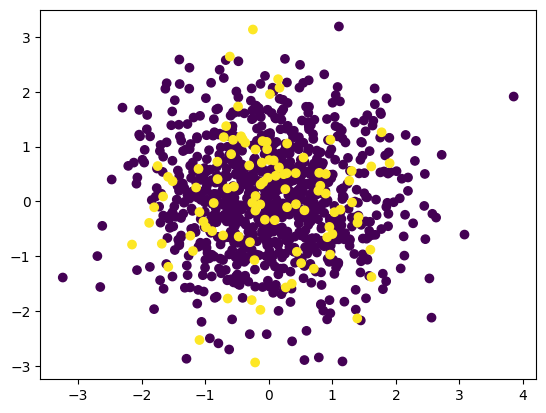

In [96]:
import matplotlib.pyplot as plt
plt.scatter(df["feature_1"],df["feature_2"], c=df["target"])

In [97]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [imblearn]


In [ ]:
from imblearn.over_sampling import SMOTE  # pyright: reportMissingImports=false

In [99]:
oversample = SMOTE()

NameError: name 'SMOTE' is not defined